In [2]:
import zipfile
import os

zip_path = os.path.expanduser("~/Downloads/archive.zip")  # path to your file
extract_path = "speech_commands"  # folder to extract to

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files are in:", extract_path)


Extraction complete. Files are in: speech_commands


In [4]:
import os

print(os.listdir("speech_commands")[:20])  # show first 20 folders/files


['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'LICENSE', 'marvin', 'nine', 'no']


In [5]:
import os

base = "speech_commands"
words = [d for d in os.listdir(base) if os.path.isdir(os.path.join(base, d))]
print("Available words:", words)


Available words: ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [6]:
for w in ["yes", "no", "stop"]:
    folder = os.path.join(base, w)
    files = [f for f in os.listdir(folder) if f.endswith(".wav")]
    print(w, "→", len(files), "samples")


yes → 4044 samples
no → 3941 samples
stop → 3872 samples


In [7]:
import random
import shutil

# words we want
words = ["yes", "no", "stop"]

# new folder for small dataset
mini_base = "mini_dataset"
os.makedirs(mini_base, exist_ok=True)

for w in words:
    folder = os.path.join(base, w)   # original folder
    files = [f for f in os.listdir(folder) if f.endswith(".wav")]
    
    # randomly choose 30 samples
    chosen = random.sample(files, 30)
    
    # make a new subfolder for this word
    target = os.path.join(mini_base, w)
    os.makedirs(target, exist_ok=True)
    
    # copy chosen files
    for f in chosen:
        shutil.copy(os.path.join(folder, f), os.path.join(target, f))
    
    print(f"{w}: copied {len(chosen)} samples")


yes: copied 30 samples
no: copied 30 samples
stop: copied 30 samples


In [8]:
import soundfile as sf
import os

# pick one file from each word folder
for word in ["yes", "no", "stop"]:
    path = os.path.join("mini_dataset", word, os.listdir(os.path.join("mini_dataset", word))[0])
    info = sf.info(path)
    print(f"{word} → {info.samplerate} Hz, {info.channels} channel(s), format={info.format}")


yes → 16000 Hz, 1 channel(s), format=WAV
no → 16000 Hz, 1 channel(s), format=WAV
stop → 16000 Hz, 1 channel(s), format=WAV


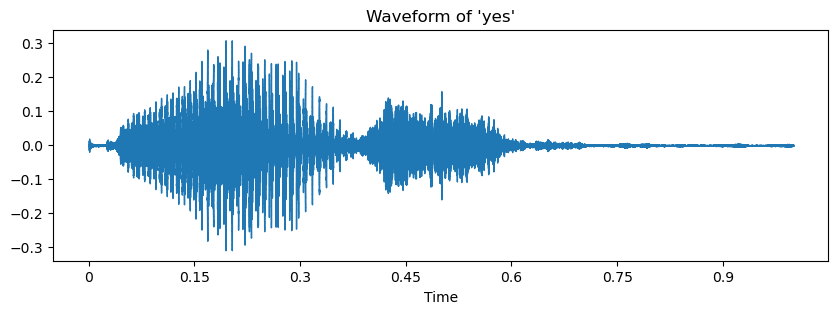

In [9]:
import librosa 
import librosa.display
import matplotlib.pyplot as plt 
import os 
# pick one example (e.g., a "yes")
file_path = os.path.join("mini_dataset", "yes", os.listdir("mini_dataset/yes")[0])
# load the audio
y, sr = librosa.load(file_path, sr=None)  # sr=None keeps original rate
# plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of 'yes'")
plt.show()




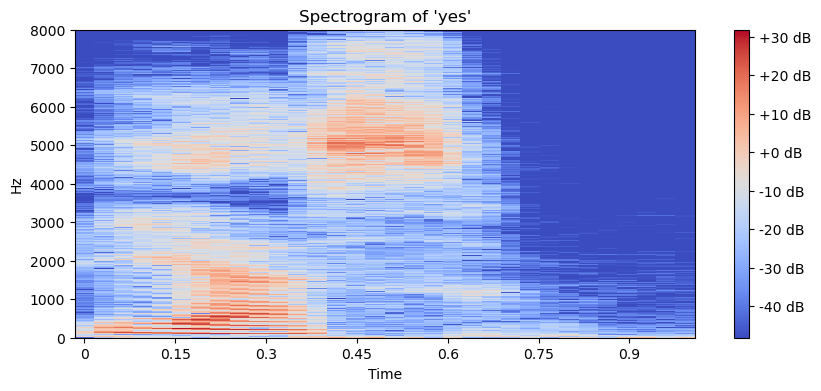

In [10]:
# create a spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of 'yes'")
plt.show()


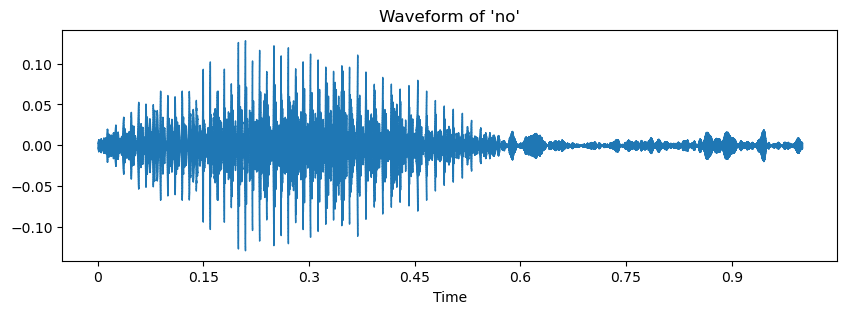

In [11]:
file_path = os.path.join("mini_dataset", "no", os.listdir("mini_dataset/no")[0])
y, sr = librosa.load(file_path, sr=None)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of 'no'")
plt.show()


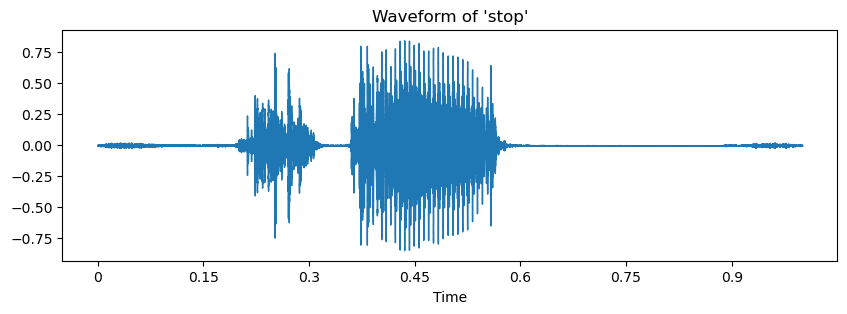

In [12]:
file_path = os.path.join("mini_dataset", "stop", os.listdir("mini_dataset/stop")[0])
y, sr = librosa.load(file_path, sr=None)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of 'stop'")
plt.show()


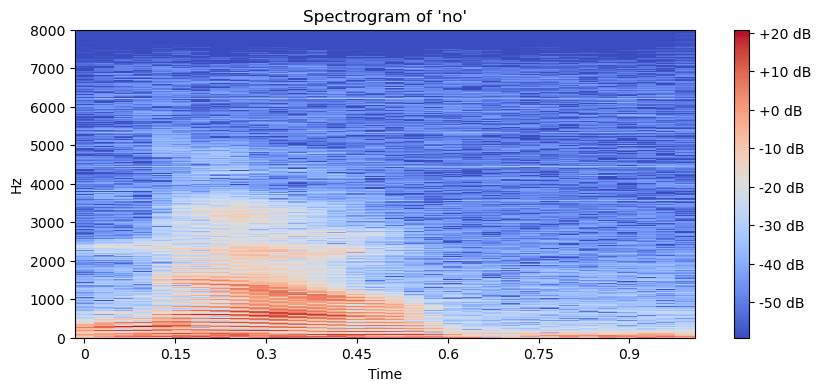

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

file_path = os.path.join("mini_dataset", "no", os.listdir("mini_dataset/no")[0])
y, sr = librosa.load(file_path, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of 'no'")
plt.show()


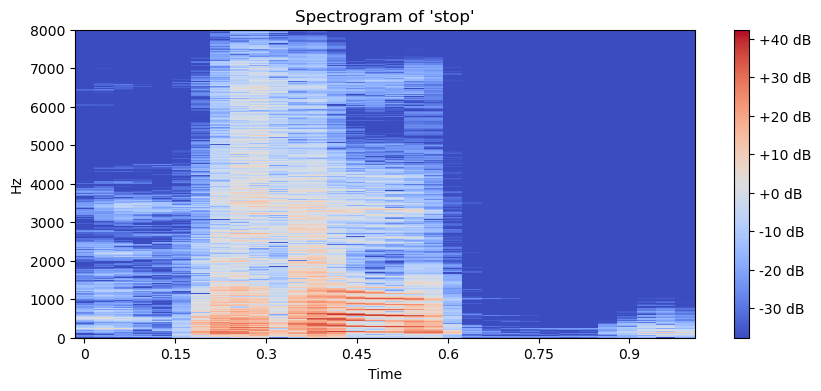

In [14]:
file_path = os.path.join("mini_dataset", "stop", os.listdir("mini_dataset/stop")[0])
y, sr = librosa.load(file_path, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of 'stop'")
plt.show()


In [3]:
import sys
!{sys.executable} -m pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   -----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [7]:
import librosa, glob
import numpy as np

def extract_mfcc(file_path, n_mfcc=13, max_len=44):
    y, sr = librosa.load(file_path, sr=16000)   # 16kHz mono
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # pad or cut to same length
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0,0),(0,pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Collect file paths
yes_files = glob.glob("data/yes/*.wav")[:30]
no_files = glob.glob("data/no/*.wav")[:30]
stop_files = glob.glob("data/stop/*.wav")[:30]

# Extract features
X_yes = np.array([extract_mfcc(f) for f in yes_files])
X_no = np.array([extract_mfcc(f) for f in no_files])
X_stop = np.array([extract_mfcc(f) for f in stop_files])

print("Shapes:", X_yes.shape, X_no.shape, X_stop.shape)


Shapes: (0,) (0,) (0,)


In [8]:
import glob

print("Yes files:", glob.glob("data/yes/*.wav"))
print("No files:", glob.glob("data/no/*.wav"))
print("Stop files:", glob.glob("data/stop/*.wav"))


Yes files: []
No files: []
Stop files: []


In [9]:
import glob

all_wavs = glob.glob("**/*.wav", recursive=True)
print("Found", len(all_wavs), "wav files")
print(all_wavs[:20])  # show first 20


Found 105967 wav files
['voice (online-audio-converter.com).wav', 'voice.wav', 'voice.wav.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\momentum_ringtones\\Open.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\ringtones\\Beep.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\ringtones\\Sunrise.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\BusyTone.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\ClosedCaptionActiveDisclaimer.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\DTMF_Tone.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\FastBusy.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\GroupCallInvite.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\Reconnect.wav', 'AppData\\Local\\CiscoSparkLauncher\\dynamic_dependencies\\sounds\\RecordingStartDisclaimer.wav', 'AppData\\Local\\CiscoSparkLa

In [10]:
import glob

yes_files = glob.glob("speech_commands/yes/*.wav")[:30]
no_files = glob.glob("speech_commands/no/*.wav")[:30]
stop_files = glob.glob("speech_commands/stop/*.wav")[:30]

print("Yes files:", len(yes_files))
print("No files:", len(no_files))
print("Stop files:", len(stop_files))


Yes files: 30
No files: 30
Stop files: 30


In [11]:
X_yes = [extract_mfcc(file) for file in yes_files]
X_no = [extract_mfcc(file) for file in no_files]
X_stop = [extract_mfcc(file) for file in stop_files]

X_yes = np.array(X_yes)
X_no = np.array(X_no)
X_stop = np.array(X_stop)

print("Shapes:", X_yes.shape, X_no.shape, X_stop.shape)


Shapes: (30, 13, 44) (30, 13, 44) (30, 13, 44)


In [12]:
# Combine features
X = np.concatenate([X_yes, X_no, X_stop], axis=0)

# Create labels (0=yes, 1=no, 2=stop)
y = np.array([0]*len(X_yes) + [1]*len(X_no) + [2]*len(X_stop))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (90, 13, 44)
y shape: (90,)


In [13]:
# Flatten MFCC features (13 * 44 = 572 features per sample)
X = X.reshape(X.shape[0], -1)

print("X reshaped:", X.shape)  # should be (90, 572)


X reshaped: (90, 572)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot encode labels (3 classes: yes, no, stop)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

print("Train shape:", X_train.shape, y_train_cat.shape)
print("Test shape:", X_test.shape, y_test_cat.shape)


Train shape: (72, 572) (72, 3)
Test shape: (18, 572) (18, 3)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(572,)),  # first hidden layer
    Dropout(0.3),                                       # regularization
    Dense(64, activation='relu'),                       # second hidden layer
    Dropout(0.3),
    Dense(3, activation='softmax')                      # output layer (3 classes)
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          73,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,795 (319.51 KB)

 Trainable params: 81,795 (319.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=30,          # number of training cycles
    batch_size=8,       # small batch size for better learning
    verbose=1
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3889 - loss: 86.8360 - val_accuracy: 0.2778 - val_loss: 22.8533
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4028 - loss: 40.8111 - val_accuracy: 0.5000 - val_loss: 10.5704
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4306 - loss: 37.6532 - val_accuracy: 0.7222 - val_loss: 4.3784
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5278 - loss: 31.6202 - val_accuracy: 0.7778 - val_loss: 1.6546
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6111 - loss: 17.5205 - val_accuracy: 0.7222 - val_loss: 6.1732
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5417 - loss: 17.1761 - val_accuracy: 0.7778 - val_loss: 1.9748
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6806 - loss: 17.3093 - val_accuracy: 0.7222 - val_loss: 4.8590
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5556 - loss: 15.1260 - val_accuracy: 0.9444 - val_los

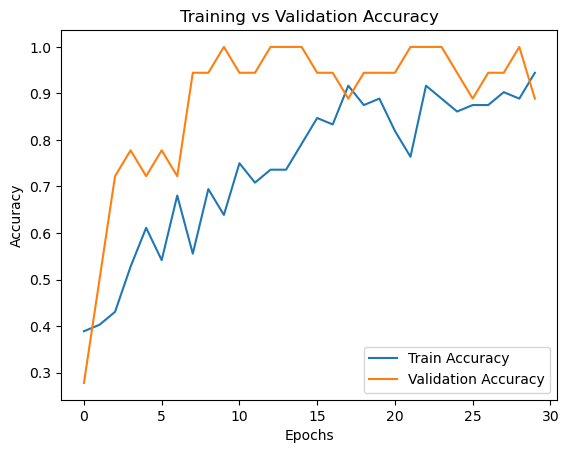

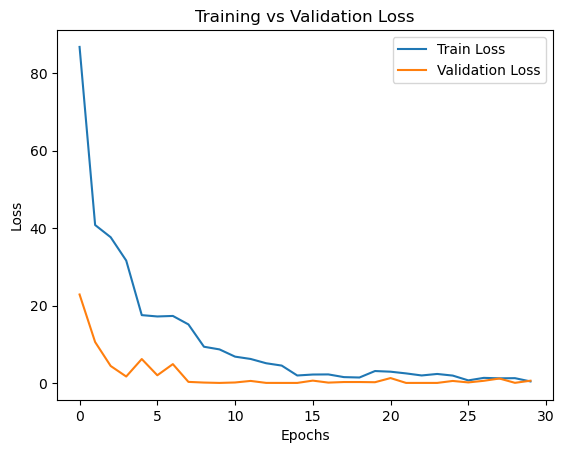

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


✅ Test Accuracy: 88.89%


In [19]:
model.save("voice_model.h5")
print("Model saved as voice_model.h5")


Model saved as voice_model.h5


In [20]:
import tensorflow as tf

# Convert the .h5 model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to file
with open("voice_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted and saved as voice_model.tflite")


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpd2c7h22f\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpd2c7h22f\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpd2c7h22f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 572), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2003154519248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154522896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154519440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154518480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154519824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154524816: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted and saved as voice_model.tflite


In [21]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="voice_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

# Pick one test sample (e.g. first from X_test)
test_sample = X_test[0:1].astype(np.float32)

# Run inference
interpreter.set_tensor(input_details[0]['index'], test_sample)
interpreter.invoke()
tflite_pred = interpreter.get_tensor(output_details[0]['index'])

print("TFLite prediction:", tflite_pred)
print("Predicted class:", np.argmax(tflite_pred))
print("True label:", np.argmax(y_test_cat[0]))


Input details: [{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([  1, 572], dtype=int32), 'shape_signature': array([ -1, 572], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
TFLite prediction: [[9.807782e-23 1.000000e+00 9.782692e-19]]
Predicted class: 1
True label: 1


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [22]:
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="voice_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Take first test sample
test_sample = X_test[0:1].astype(np.float32)  # shape (1, 572)

# Check input shape
print("Expected input shape:", input_details[0]['shape'])
print("Sample shape:", test_sample.shape)

# Set input and run
interpreter.set_tensor(input_details[0]['index'], test_sample)
interpreter.invoke()

# Get output
tflite_pred = interpreter.get_tensor(output_details[0]['index'])

print("TFLite prediction:", tflite_pred)
print("Predicted class:", np.argmax(tflite_pred))
print("True label:", np.argmax(y_test_cat[0]))


Expected input shape: [  1 572]
Sample shape: (1, 572)
TFLite prediction: [[9.807782e-23 1.000000e+00 9.782692e-19]]
Predicted class: 1
True label: 1


In [23]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
with open("voice_model_quant.tflite", "wb") as f:
    f.write(tflite_quant_model)
print("Quantized TFLite model saved")


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpzc5188pe\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpzc5188pe\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpzc5188pe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 572), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2003154519248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154522896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154519440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154518480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154519824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003154524816: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized TFLite model saved


In [1]:
import os
print(os.getcwd())  # this shows the folder where your notebook runs
print(os.listdir()) # this lists all files in that folder


C:\Users\User
['.anaconda', '.arduinoIDE', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', '.stm32cubeide', '.stm32cubemx', '.stmcube', '.stmcufinder', '.vscode', '6PmajNSF8Kl', 'a.c', 'AppData', 'Application Data', 'c', 'command.c', 'Contacts', 'Cookies', 'DebugConfig', 'Documents', 'Downloads', 'Dropbox', 'Favorites', 'iCloudDrive', 'iCloudPhotos', 'if.c', 'kVWSiuXPDm8', 'Links', 'Local Settings', 'micro.c', 'mini_dataset', 'Music', 'My Documents', 'NetHood', 'Nn.c', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{4e1d0c86-f34e-11ef-afbb-c3d0a3e1550f}.TM.blf', 'NTUSER.DAT{4e1d0c86-f34e-11ef-afbb-c3d0a3e1550f}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{4e1d0c86-f34e-11ef-afbb-c3d0a3e1550f}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'output', 'PrintHood', 'qms-bmh1.bmp', 'qms-bmh2.bmp', 'qms-bmh3.bmp', 'quartus2.ini', 'quartus2.qreg', 'quartus_web_rules_file.

In [2]:
import os

# Find absolute path of your quantized model
file_path = os.path.abspath("voice_model_quant.tflite")
print("Your TFLite file path is:\n", file_path)


Your TFLite file path is:
 C:\Users\User\voice_model_quant.tflite
